In [1]:
# reload scripts
try:
    os.chdir(ROOT_DIR)
except:
    pass
%run moment_calculation.py
%run dataset.py
%run summary_portfolio_stats.py
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In this notebook, we explore the impact of widespread Robinhood trading on the macroscopic level. We focus on daily data, and study whether trading activity on Robinhood has some impact on market features. We focus especially on the  implications of Robinhood trading in terms of financial risk management.

# Exploration on the stock level

## Get all the Robinhood stock trading data available

### Getting the names of the stocks that are available on Robinhood's database

In [2]:
tickers = get_available_tickers()

In [3]:
print("We have for a total of {} different stocks.".format(len(tickers)))

We have for a total of 8597 different stocks.


### Making a dataset with end of day Robinhood user data for these stocks 

For the study of macroscopic effect, we will focus on end of day number of users who own any particular stock.

In [4]:
robinhood_popularity = merged_daily_usage_data(tickers)

Text(0, 0.5, 'Number of different stocks detained across users')

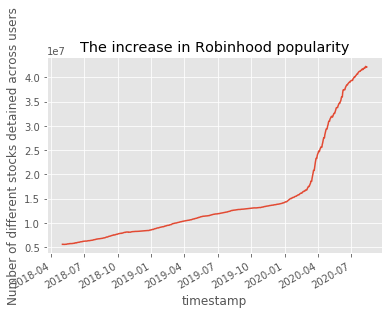

In [5]:
robinhood_popularity.sum(axis=1).plot()
plt.title("The increase in Robinhood popularity")
plt.ylabel("Number of different stocks detained across users")

### Overview of stock that are most traded on Robinhood

Here are the most popular stocks at the beginning and at the end of the observation period (by number of users who own them).

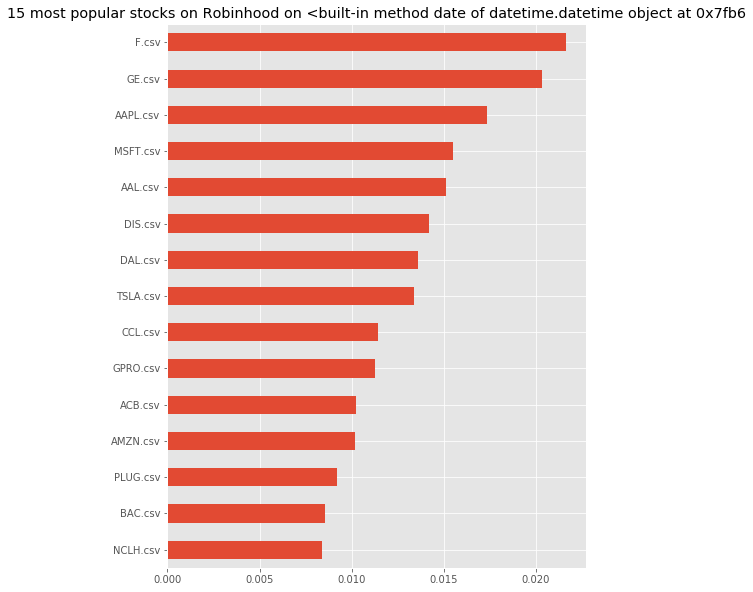

In [6]:
most_popular_end = most_popular_stocks(robinhood_popularity)

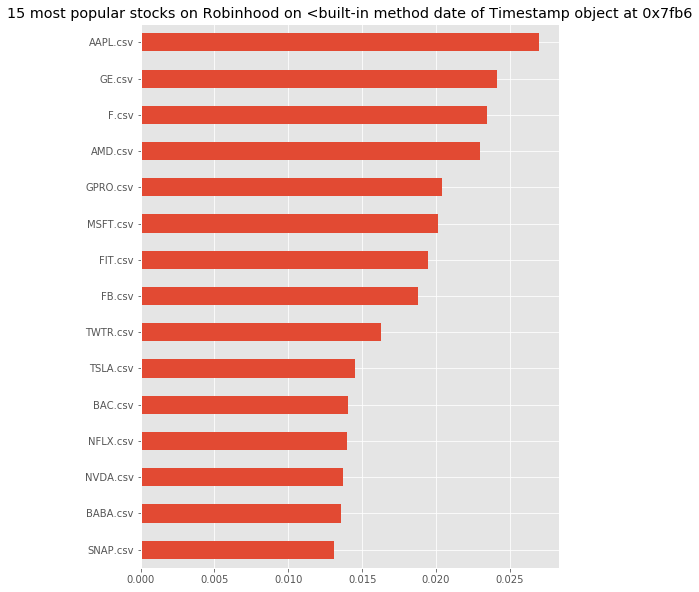

In [7]:
most_popular_start = most_popular_stocks(robinhood_popularity, date=robinhood_popularity.index[0])

## Get price data corresponding to the stocks held by Robinhood users

## Get the corresponding stock prices 